# Faculty Salary Data


## BACKGROUND
Differences in salaries between men and women at US colleges and universities are well documented. Because salary discrimination based on sex is illegal in the US, there is considerable controversy over whether the differences between male and female faculty members salaries are due to sex bias. Other explanations which have been put forward for salary disparities between men and women include differences in experience, degree attained, the field in which one works, administrative responsibilities, and productivity, among others.

The variable names and description are given below:

case = case number

id = identification number for the faculty member

sex = M (male) or F (female)

deg = highest degree attained: PhD, Prof (professional degree, eg, 
medicine or law), or Other (Master's or Bachelor's degree)

yrdeg = year highest degree attained

field = Arts (Arts and Humanities), Prof (professional school, ie, 
Business, Law, Engineering or Public Affairs), or Other

startyr = year in which the faculty member was hired (2 digits)

year = year (2 digits)

rank = rank of the faculty member in this year: Assist (Assistant), 
Assoc (Associate), or Full (Full)

admin = indicator of whether the faculty member had administrative 
duties (eg, department chair) in this year: 1 (yes), or 0 (no)

salary = monthly salary of the faculty member in this year in dollars 


## QUESTIONS OF INTEREST

The goal of the analysis is to determine whether sex bias exists and to describe the magnitude and nature of the effect. Your analysis should revolve around the following specific questions of interest:

1. How the salary is distributed according to the Rank?
2. Overall, how would you answer the question: Is there sex bias in salaries at the university?
3. How the salary is distributed according to the Degree?

# Importing Libraries<a id="0"></a>


In [1]:
#Import primary modules.
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

#Importing Matplotlib
#%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.2


## Importing Data <a id="2"></a>
Dataset: https://courses.washington.edu/b517/Datasets/SalaryData.csv


In [2]:
df_can = pd.read_csv('https://courses.washington.edu/b517/Datasets/SalaryData.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.head()

,case,id,gender,deg,yrdeg,field,startyr,year,rank,admin,salary
0,1,1,F,Other,92,Other,95,95,Assist,0,6684.0
1,2,2,M,Other,91,Other,94,94,Assist,0,4743.0
2,3,2,M,Other,91,Other,94,95,Assist,0,4881.0
3,4,4,M,PhD,96,Other,95,95,Assist,0,4231.0
4,5,6,M,PhD,66,Other,91,91,Full,1,11182.0


Let's find out how many entries there are in our dataset.


In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(19792, 11)


# Visualizing Data using Matplotlib<a id="4"></a>


In [7]:
# Looking for null values
df_can.isnull().sum()

case       0
id         0
gender     0
deg        0
yrdeg      0
field      0
startyr    0
year       0
rank       4
admin      0
salary     0
dtype: int64

In [ ]:
df_can_rows = df_can[df_can.isnull().any(axis = 1)]
df_null_rows

In [14]:
# Dropping the null values
df_can.dropna(inplace = True)

In [15]:
df_can.isnull().sum()

case       0
id         0
gender     0
deg        0
yrdeg      0
field      0
startyr    0
year       0
rank       0
admin      0
salary     0
dtype: int64

In [16]:
df_can

,case,id,gender,deg,yrdeg,field,startyr,year,rank,admin,salary
0,1,1,F,Other,92,Other,95,95,Assist,0,6684.0
1,2,2,M,Other,91,Other,94,94,Assist,0,4743.0
2,3,2,M,Other,91,Other,94,95,Assist,0,4881.0
3,4,4,M,PhD,96,Other,95,95,Assist,0,4231.0
4,5,6,M,PhD,66,Other,91,91,Full,1,11182.0
...,...,...,...,...,...,...,...,...,...,...,...
19787,19788,1770,M,Other,51,Other,64,91,Full,0,5318.0
19788,19789,1770,M,Other,51,Other,64,92,Full,0,5472.0
19789,19790,1770,M,Other,51,Other,64,93,Full,0,5551.0
19790,19791,1770,M,Other,51,Other,64,94,Full,0,5551.0


# Pie Charts 

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices.



In [18]:
df_can.columns

Index(['case', 'id', 'gender', 'deg', 'yrdeg', 'field', 'startyr', 'year',
       'rank', 'admin', 'salary'],
      dtype='object')

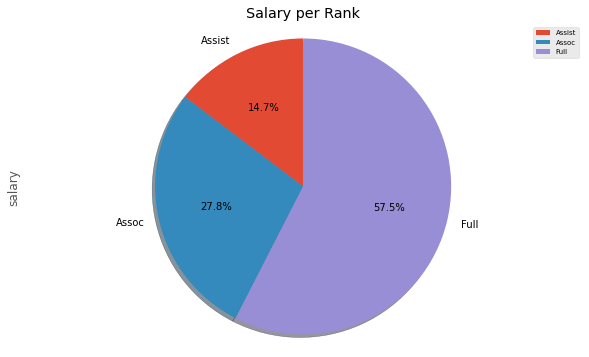

In [45]:
df_rank = df_can.groupby('rank', axis = 0).sum()
df_rank['salary'].plot(kind = 'pie',
                     figsize = (10,6),
                     autopct = '%1.1f%%', 
                     startangle = 90,
                     shadow = True
                     )
plt.title('Salary per Rank') 

plt.axis('equal') 

# add legend
plt.legend(labels=df_rank.index, loc='upper right', fontsize=7) 

plt.show()

## Conclusion

This Pie chart shows "Salary by Rank". From this chart we can see the Full time Faculty members get maximum salary which is 57.5%, follwed by the Associate faculty members, which is 27.8 % and lastly the Assistant faculty members which is 14.7%

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


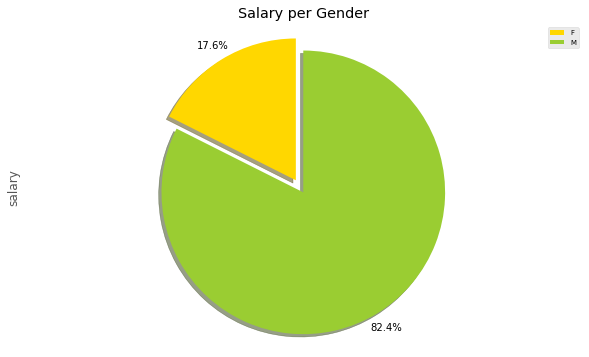

In [33]:
df_gender = df_can.groupby('gender', axis = 0).sum()
print(type(df_can.groupby('gender', axis = 0)))
df_gender.head()
color_list = ['gold', 'yellowgreen']
explode_list = [0.1, 0]


df_gender['salary'].plot(kind = 'pie',
                     figsize = (10,6),
                     autopct = '%1.1f%%', 
                     startangle = 90,
                     shadow = True,
                         labels = None,
                         pctdistance = 1.12,
                         explode = explode_list,
                         colors = color_list
                     )
plt.title('Salary per Gender') 

plt.axis('equal') 

# add legend
plt.legend(labels=df_gender.index, loc='upper right', fontsize=7) 

plt.show()

## Conclusion

This Pie chart shows "Salary by Gender". From this chart we can see the the Male faculty member gets the maximum salary which is 82.4% and for Female the salary is 17.6%

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


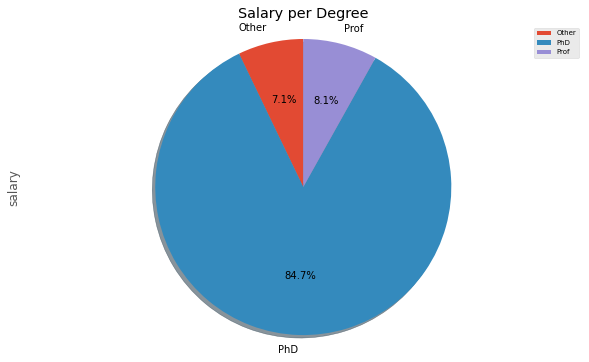

In [37]:
df_deg = df_can.groupby('deg', axis = 0).sum()
print(type(df_can.groupby('deg', axis = 0)))
df_deg.head()
df_deg['salary'].plot(kind = 'pie',
                     figsize = (10,6),
                     autopct = '%1.1f%%', 
                     startangle = 90,
                     shadow = True
                     )
plt.title('Salary per Degree') 

plt.axis('equal') 

# add legend
plt.legend(labels=df_deg.index, loc='upper right', fontsize=7) 

plt.show()

## Conclusion

Experience is another factor that influences faculty salaries. A faculty member's salary tends to increase with the amount of experienced that person is like from the above graph we can see that the faculty who gets more salary is "PhD" which is 84.7%, followed by the Prof (professional degree, eg, medicine or law), which is 8.1% and then Other (Master's or Bachelor's degree) with 7.1%.

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


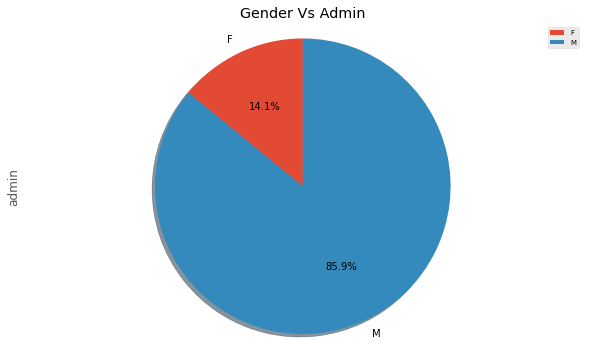

In [44]:
df_AdminVsGen = df_can.groupby('gender', axis = 0).sum()
print(type(df_can.groupby('gender', axis = 0)))
df_AdminVsGen.head()
df_AdminVsGen['admin'].plot(kind = 'pie',
                     figsize = (10,6),
                     autopct = '%1.1f%%', 
                     startangle = 90,
                     shadow = True
                     )
plt.title('Gender Vs Admin') 

plt.axis('equal') 

# add legend
plt.legend(labels=df_AdminVsGen.index, loc='upper right', fontsize=7) 

plt.show()

## Conclusion

This Pie chart shows "Gender Vs Admin". From this chart we can see most of the Male are Admin, 85.9% as compair to the Female which is 14.1%

# Final Insight

According to the "Salary by Gender" and "Gender Vs Admin", we come to a conclusion that there is Gender biasness for Male Faculties
